In [83]:
from rateslib import Curve,Solver,IRS
import pandas as pd
from datetime import datetime



csv_path = "Full_Market_Data.csv"
data = pd.read_csv(csv_path)
business_days = 0

today_date = datetime(2024,6,14)

data['Date'] = pd.to_datetime(data['Date'])

sofr = Curve(
    id="sofr",
    convention="Act360",
    calendar="nyc",
    modifier="MF",
    interpolation="log_linear",
    nodes={
        **{today_date: 1.0},  # <- this is today's DF,
        **{_: 1.0 for _ in data["Date"]},
    }
)

sofr_args = dict(effective=datetime(2024, 6, 18), spec="usd_irs", curves="sofr")

solver = Solver(
    curves=[sofr],
    instruments=[IRS(termination=_, **sofr_args) for _ in data["Date"]],
    s=data["Market Rate"],
    # instrument_labels=data["Date"],
    # id="us_rates",
)

data["Calculated Discount"] = [float(sofr[_]) for _ in data["Date"]]
data['Difference in %'] = (data['Calculated Discount'] - data['Discount'])*100

data['Tenure'] = data['Date'].apply(lambda x: ((x - today_date).days) / 365)
data['Calculated Zero Rate'] = -np.log(data['Calculated Discount']) / data['Tenure']*100

data['Zero Rate Difference in %'] = (data['Calculated Zero Rate'] - data['Zero Rate'])
data


SUCCESS: `func_tol` reached after 7 iterations (levenberg_marquardt), `f_val`: 8.72167579782728e-16, `time`: 0.3785s


,Date,Market Rate,Shift (bp),Shifted Rate,Zero Rate,Discount,Calculated Discount,Difference in %,Tenure,Calculated Zero Rate,Zero Rate Difference in %
0,2024-06-25,5.32250,0.0,5.32250,5.39363,0.998376,0.998376,-1.580862e-05,0.030137,5.393633,3.074443e-06
1,2024-07-02,5.33050,0.0,5.33050,5.39776,0.997342,0.997342,-3.699167e-05,0.049315,5.397761,1.248273e-06
2,2024-07-09,5.33300,0.0,5.33300,5.39787,0.996310,0.996310,-3.447332e-05,0.068493,5.397869,-5.526927e-07
3,2024-07-18,5.33590,0.0,5.33590,5.39750,0.994985,0.994985,-1.912888e-05,0.093151,5.397501,1.446957e-06
4,2024-08-19,5.34020,0.0,5.34020,5.38987,0.990301,0.990301,2.797057e-05,0.180822,5.389866,-3.918841e-06
5,2024-09-18,5.34630,0.0,5.34630,5.38427,0.985938,0.985938,4.446614e-05,0.263014,5.384265,-4.560020e-06
6,2024-10-18,5.32050,0.0,5.32050,5.34784,0.981708,0.981708,3.179428e-05,0.345205,5.347842,1.914370e-06
7,2024-11-18,5.30140,0.0,5.30140,5.31737,0.977388,0.977388,-3.800179e-05,0.430137,5.317367,-3.386471e-06
8,2024-12-18,5.28183,0.0,5.28183,5.28689,0.973277,0.973277,2.755898e-05,0.512329,5.286892,1.807902e-06
9,2025-01-21,5.24250,0.0,5.24250,5.23596,0.968795,0.968795,-4.225650e-05,0.605479,5.235964,3.639875e-06


# Constructing Yield Curves : SOFR



### Definitions

**Discount Factor (DF):**

_ps: I am using DF = discount factor throughout this note, so it's not pandas Data Frame_

The discount factor $ DF(t) $ is the present value of one unit of currency payable at time $ t $ in the future. It is given by:

$$ DF(t) = \frac{1}{(1 + r \cdot t)} $$

where $ r $ is the market rate, and $ t $ is the time in years.

**Zero Rate (Z):**

The zero rate, also known as the spot rate, is the rate of interest earned on an investment that starts today and ends at time $ t $. It can be derived from the discount factor as follows:

$$ Z(t) = -\frac{\ln(DF(t))}{t} $$


## Calculating Discount Factor for df < 1 year 
![Timeline for Yield Curve Calculation below 1 year](below_1_year.png)
note: visual example for $T = \text{1 week}$


**Example:**

- **Today’s Date (Trade Date):** June 14, 2024
- **Settlement Date:** June 18, 2024 (T+2 convention)

The settlement date is calculated by adding two business days to the trade date. If the trade date is June 14, 2024 (a Friday), the settlement date would be June 18, 2024 (a Tuesday), considering that June 15 and June 16 are weekend days.


#### Calculating the First Discount Factor (and Discount Factor for t < 1 year)



Let say, given the parameters:
- **Today's Date:** June 14, 2024
- **Settlement Date:** June 18, 2024
- **Maturity Date:** September 18, 2024 (3 month from the settlement date)
- **Day Count Convention:** Actual/360 (Act/360)
- **Market Rate:** 5.34630% (or 0.0534630)

**Steps:**

1. **Calculate the Time Fractions:**

   - From Today's Date to Settlement Date (denoted as $ DF_0 $):
     $$ t_0 = \frac{4 \text{ days}}{360}  $$

   - From Settlement Date to Maturity Date (denoted as $ DF_t $):
     $$ t_{maturity} = \frac{3 \text{ months}}{360}  $$

2. **Calculate the Discount Factor from Settlement Date to Maturity Date (DF1):**

   Using the market rate of 5.32250% (or 0.053225):
   $$ DF_t(t_{maturity}) = \frac{1}{1 + r \cdot t_{maturity}} = \frac{1}{1 + 0.0534630 \cdot \frac{92}{360}}$$

3. **Adjust for the Time from Today's Date to Settlement Date (DF0):**
   $$ DF_{\text{total}} = DF_t(t_{maturity}) \cdot DF_0(t_0) $$
   $$ DF_{\text{total}} = \frac{1}{1 + 0.0534630 \cdot \frac{92 }{360}} \cdot \frac{1}{1 + 0.053225 \cdot \frac{4}{360}} $$
   $$ DF_{\text{total}} \approx 0.985938 $$

### Calculating the Zero Rate

Using the discount factor $ DF_{\text{total}} $:

$$ Z(t) = -\frac{\ln(DF_{total}(t))}{t} $$

For $ t $ from June 14, 2024, to June 25, 2024:
$$ t = \frac{96 \text{ days}}{365}  $$

$$ Z(t) = -\frac{\ln(0.985938)}{\frac{96 \text{ days}}{365}} \$$





### T=3 Month Cashflow

In [122]:
cf = IRS(termination="3M", effective=datetime(2024, 6, 18), spec="usd_irs", curves=sofr).cashflows()
cf[:1]

,,Type,Period,Ccy,Acc Start,Acc End,Payment,Convention,DCF,Notional,DF,Collateral,Rate,Spread,Cashflow,NPV,FX Rate,NPV Ccy
leg1,0,FixedPeriod,Stub,USD,2024-06-18,2024-09-18,2024-09-20,act360,0.255556,1000000.0,0.985656,None,5.3463,NaN,-13662.766667,-13466.786166,1.0,-13466.786166


In [125]:
df_t = 1/(1+0.053463 *0.255556) 
df_0a = np.exp(-0.0539363*4/365)
df_0b = 1/(1+0.0532132*4/360)

#Comparing 
print(-np.log(df_t *df_0a)/96*365) #using given zero rate value (bloomberg)
print(-np.log(df_t *df_0b)/96*365) #using df formula
print(data['Zero Rate'][5]/100) #bloomberg value
# df_t *df_0b

0.05384274224365742
0.05384274343766324
0.0538427


0.98593842157255

## Calculating Discount Factor for $ t > 1 $ year with Cashflows

When dealing with maturities greater than one year, we need to account for the periodic cashflows (coupon payments) in addition to the notional repayment at maturity.

![Timeline for Yield Curve Calculation](more_than_1_year.png)

### General Formula


For a bond with periodic coupon payments, the present value $ P $ is given by the sum of the present values of all future cashflows:

$$ P = \sum_{i=1}^{n-1} \left(\text{OIS\_rate} \times A_i \times DF_i\right) + \left(\text{OIS\_rate} \times A_n + N\right) \times DF_n $$

Where:
- $ P $ is the current bond price (notional).
- $ \text{OIS\_rate} $ is the market rate.
- $ A_i $ is the accrual factor for each period.
- $ DF_i $ is the discount factor for each cashflow.
- $ N $ is the notional amount payable at maturity.
- $ n $ is the total number of periods.

To calculate the final discount factor for a bond with multiple cashflows, we solve for $ DF_n $ from the bond price equation:

$$ DF_n = \frac{P - \sum_{i=1}^{n-1} \left(\text{OIS\_rate} \times A_i \times DF_i\right)}{\text{OIS\_rate} \times A_n + N} $$

Where:
- $ P $ represents $ DF_0 $, the initial discount factor from the trade date to the settlement date.
- $ DF_i $ is the discount factor for each intermediate cashflow.
- $ DF_n $ is the discount factor for the final cashflow including the notional repayment.

The intermediate discount factors $ DF_i $ are calculated as:

$$ DF_i = \left( \frac{1}{1 + r_i } \right)^{t_i} \cdot DF_0 $$

Where:
- $ r_i $ is the market rate for each period.
- $ t_i $ is the time in years for each cashflow period.
- $ DF_0 $ is the initial discount factor from the trade date to the settlement date.

### Example

Given:
- **Today's Date (Trade Date):** June 14, 2024
- **Settlement Date:** June 18, 2024 (T+2 convention)
- **Maturity Date:** June 18, 2027
- **Coupon Rate (OIS\_rate):** 4.2830% (or 0.04283)
- **Notional Amount:** $1,000,000
- **Day Count Convention:** Actual/360 (Act/360)
- **Market Rates:** 5.39363%, 5.05700%, 4.56550%, 4.28300%

**Steps:**

1. **Calculate the Initial Discount Factor:**

   - From Today's Date to Settlement Date (denoted as $ \text{discount\_factor}_0 $):
     $$
     \text{DF}_0 = e^{-\frac{5.39363}{100} \cdot \frac{4}{365}}  \quad \text{(using the zero rate over the days from June 14 to June 18)}
     $$

2. **Calculate the Intermediate Discount Factors:**

   Using the provided market rates and payment data:
   
   - For June 18, 2025 (1 year):
     $$
     \text{DF}_1 = \left( \frac{1}{1 + \frac{5.05700}{100}} \right)^\frac{\text{1 year}}{360} \cdot \text{DF}_0
     $$

   - For June 18, 2026 (2 years):
     $$
     \text{DF}_2 = \left( \frac{1}{1 + \frac{4.56550}{100}} \right)^\frac{\text{2 year}}{360} \cdot \text{DF}_0
     $$

3. **Calculate the Present Value of Each Cashflow:**

   - Coupon payments are calculated using the market rate $\text{OIS\_rate}$, day count fraction ($ A_i $), and the intermediate discount factors.
   - The day count fraction $ 1.013889 $ corresponds to Actual/360 for one year.
   
   - For June 18, 2025 (1 year):
     $$
     A_1 = \frac{\text{1 year}}{360} = 1.013889 \quad \text{(time between settlement date and } c1 \text{)}
     $$
     $$
     c1 = 0.04283 \times A_1 \times \text{DF}_1 \quad \text{(Coupon payment times day count fraction times DF}_1 \text{)}
     $$

   - For June 18, 2026 (2 years):
     $$
     A_2 = \frac{\text{1 year}}{360}= 1.013889 \quad \text{(time between } c1 \text{ and } c2 \text{)}
     $$
     $$
     c2 = 0.04283 \times A_2 \times \text{DF}_2 \quad \text{(Coupon payment times day count fraction times DF}_2 \text{)}
     $$

4. **Calculate the Final Discount Factor $ \text{DF}_{\text{total}} $**:

   For the bond maturing on June 18, 2027:
   
   - Given the market rate $ \text{OIS\_rate} = 4.2830\% $ and duration final $ t = 1.013889 $:
     $$
     A_{\text{final}} = \frac{\text{1 year}}{360}= 1.013889 \quad \text{(time between } c2 \text{ and final payment)}
     $$
     $$
     \text{DF} = \frac{\text{DF}_0 - c1 - c2}{1 + 0.04283 \times A_{\text{final}}}
     $$

5. **Calculate the Zero Rate:**

   Using the discount factor $ \text{DF}_{\text{total}} $:
   $$
   \text{rate} = -\frac{\ln(\text{DF})}{3.010959}
   $$

### T=3 Years Casflow

In [134]:
cf = IRS(termination="3Y", effective=datetime(2024, 6, 18), spec="usd_irs", curves=sofr).cashflows()
cf[:3]


Type   Period  Ccy  Acc Start    Acc End    Payment Convention  \
leg1 0  FixedPeriod  Regular  USD 2024-06-18 2025-06-18 2025-06-23     act360   
     1  FixedPeriod  Regular  USD 2025-06-18 2026-06-18 2026-06-23     act360   
     2  FixedPeriod  Regular  USD 2026-06-18 2027-06-18 2027-06-22     act360   

             DCF   Notional        DF Collateral   Rate  Spread      Cashflow  \
leg1 0  1.013889  1000000.0  0.950121       None  4.283     NaN -43424.861111   
     1  1.013889  1000000.0  0.912676       None  4.283     NaN -43424.861111   
     2  1.013889  1000000.0  0.879905       None  4.283     NaN -43424.861111   

                 NPV  FX Rate       NPV Ccy  
leg1 0 -41258.884844      1.0 -41258.884844  
     1 -39632.844700      1.0 -39632.844700  
     2 -38209.773847      1.0 -38209.773847

In [11]:
import numpy as np

mr = 4.28300/100 # market rate at june 18 2027

df0 = np.exp(-5.39363/100*4/365)  # np.exp(-zero rate* (18june -14june).dt.days/365) 
df1 = (1/(1 + 5.05700/100 )** 1.012959) * df0  #0.950666#
df2 = (1/(1 + 4.56550/100 )** 2.012959) * df0  #0.913135#

duration_1 = 1.013889 # time between settlement date and c1
duration_2 = 1.013889 # time between c1 and c2
duration_final = 1.013889 # # time between c2 and final payment

c1 = mr * duration_1 * df1
c2 = mr * duration_2 * df2 


df = (df0 - c1 - c2)/(1 + mr*duration_final)
rate = -np.log(df)/3.010959

print(df,rate*100)
# df=0.880248 rate=4.23624

0.8802321558814443 4.236842574107


## For >10 years (when there are gaps in the market rate data)

The goal is to solve for both $ DF_{gap} $ (the discount factor for the gap period) and $ DF_n $ (the discount factor for the final cashflow including the notional repayment) using log-linear interpolation (in this example) for the gap period based on dates.

![Timeline for Yield Curve Calculation](more_than_10_year.png)


### Context

To address the gap in the data, we can use interpolation techniques to estimate the missing discount factors. In this case, we use log-linear interpolation for the gap period. 

### Steps to Solve the Equations

#### 1. Log-Linear Interpolation for $ DF_{gap} $

To estimate $ DF_{gap} $, we use log-linear interpolation between the discount factor before the gap $ DF_{n-1} $ and the discount factor after the gap $ DF_n $.

$$ \ln(DF_{gap}) = \ln(DF_{n-1}) + \frac{(\ln(DF_n) - \ln(DF_{n-1})) \cdot (x_{gap} - x_{n-1})}{(x_n - x_{n-1})} $$

$$ DF_{gap} = \exp\left(\ln(DF_{n-1}) + \frac{(\ln(DF_n) - \ln(DF_{n-1})) \cdot (x_{gap} - x_{n-1})}{(x_n - x_{n-1})}\right) $$

Where:
- $ x_{n-1} $: Number of days from the reference date to $ \text{Date}_{n-1} $
- $ x_{gap} $: Number of days from the reference date to $ \text{Date}_{gap} $
- $ x_n $: Number of days from the reference date to $ \text{Date}_n $
- $ DF_{n-1} $: Discount factor before the gap
- $ DF_n $: Discount factor after the gap

This interpolation allows us to estimate the discount factor $ DF_{gap} $ at the midpoint, ensuring a smooth transition.

#### 2. Final Discount Factor $ DF_n $


After estimating $ DF_{gap} $, we can calculate $ DF_n $ using the final discount factor formula. This formula adjusts the initial discount factor $ P $ (or $ DF_0 $) by subtracting the sum of previous terms, including the interpolated discount factor for the gap period, and dividing by the adjusted factors for the final period.

$$ DF_n = \frac{P - \sum_{i=1}^{n-1} \left(\text{OIS\_rate} \times A_i \times DF_i\right) - \left(\text{OIS\_rate} \times A_{gap} \times DF_{gap}\right)}{\text{OIS\_rate} \times A_n + N} $$

Where:
- $ P $ represents the initial discount factor $ DF_0 $
- $ \text{OIS\_rate} $: Market rate
- $ \sum_{i=1}^{n-1} \left(\text{OIS\_rate} \times A_i \times DF_i\right) $: Sum of previous terms
- $ A_{gap} $: Accrual factor for the gap period
- $ A_n $: Accrual factor for the final period
- $ N $: Notional amount (assumed to be 1 for simplicity)


In [24]:
instrument = IRS(termination="12Y", effective=datetime(2024, 6, 18), spec="usd_irs", curves=sofr).cashflows()
instrument["param"] = instrument["DCF"]*3.86084/100*instrument["DF"]
leg1 = instrument[:12]
leg1

Type   Period  Ccy  Acc Start    Acc End    Payment  \
leg1 0   FixedPeriod  Regular  USD 2024-06-18 2025-06-18 2025-06-23   
     1   FixedPeriod  Regular  USD 2025-06-18 2026-06-18 2026-06-23   
     2   FixedPeriod  Regular  USD 2026-06-18 2027-06-18 2027-06-22   
     3   FixedPeriod  Regular  USD 2027-06-18 2028-06-20 2028-06-22   
     4   FixedPeriod  Regular  USD 2028-06-20 2029-06-18 2029-06-21   
     5   FixedPeriod  Regular  USD 2029-06-18 2030-06-18 2030-06-21   
     6   FixedPeriod  Regular  USD 2030-06-18 2031-06-18 2031-06-23   
     7   FixedPeriod  Regular  USD 2031-06-18 2032-06-18 2032-06-22   
     8   FixedPeriod  Regular  USD 2032-06-18 2033-06-21 2033-06-23   
     9   FixedPeriod  Regular  USD 2033-06-21 2034-06-20 2034-06-22   
     10  FixedPeriod  Regular  USD 2034-06-20 2035-06-18 2035-06-21   
     11  FixedPeriod  Regular  USD 2035-06-18 2036-06-18 2036-06-23   

        Convention       DCF   Notional        DF Collateral     Rate  Spread  \
leg1 0      act360  1.013889  1000000.0  0.950121       None  3.86084     NaN   
     1      act360  1.013889  1000000.0  0.912676       None  3.86084     NaN   
     2      act360  1.013889  1000000.0  0.879905       None  3.86084     NaN   
     3      act360  1.022222  1000000.0  0.849124       None  3.86084     NaN   
     4      act360  1.008333  1000000.0  0.819705       None  3.86084     NaN   
     5      act360  1.013889  1000000.0  0.790726       None  3.86084     NaN   
     6      act360  1.013889  1000000.0  0.762373       None  3.86084     NaN   
     7      act360  1.016667  1000000.0  0.734866       None  3.86084     NaN   
     8      act360  1.022222  1000000.0  0.707981       None  3.86084     NaN   
     9      act360  1.011111  1000000.0  0.681940       None  3.86084     NaN   
     10     act360  1.008333  1000000.0  0.656427       None  3.86084     NaN   
     11     act360  1.016667  1000000.0  0.631601       None  3.86084     NaN   

             Cashflow           NPV  FX Rate       NPV Ccy     param  
leg1 0  -39144.627779 -37192.144050      1.0 -37192.144050  0.037192  
     1  -39144.627779 -35726.376870      1.0 -35726.376870  0.035726  
     2  -39144.627779 -34443.573024      1.0 -34443.573024  0.034444  
     3  -39466.364445 -33511.850538      1.0 -33511.850538  0.033512  
     4  -38930.136667 -31911.216466      1.0 -31911.216466  0.031911  
     5  -39144.627779 -30952.692694      1.0 -30952.692694  0.030953  
     6  -39144.627779 -29842.819213      1.0 -29842.819213  0.029843  
     7  -39251.873334 -28844.855050      1.0 -28844.855050  0.028845  
     8  -39466.364445 -27941.425608      1.0 -27941.425608  0.027941  
     9  -39037.382223 -26621.165157      1.0 -26621.165157  0.026621  
     10 -38930.136667 -25554.790370      1.0 -25554.790370  0.025555  
     11 -39251.873334 -24791.526134      1.0 -24791.526134  0.024792

### check using cashflow table

In [141]:
df0 = np.exp(-5.39363/100*4/365) 


sum = leg1["param"][:11].sum()
mr = 3.86084/100
duration_final = 1.016667

(df0 - sum )/(1 + mr*duration_final)

# 0.631934

0.6320567627576005

### check using $\frac{1}{(1+r)^t} \cdot \text{DF}_0$

In [177]:
# 1/(1+ r)**t
df0 = np.exp(-5.39363 / 100 * 4 / 365)
mr = 3.86084/100

columns_to_drop = ["Shift (bp)", "Shifted Rate", "Calculated Discount", "Difference in %","Calculated Zero Rate","Zero Rate Difference in %"]
data1 = data.drop(columns=columns_to_drop)
columns_to_drop = ["Type", "Period", "Ccy", "Notional","Collateral","Spread","Cashflow","NPV","FX Rate","NPV Ccy"]
leg1a = leg1.drop(columns=columns_to_drop)

merged_df = pd.merge(data1, leg1a, left_on='Date', right_on='Acc End', how='inner')
merged_df

merged_df["param"] =  mr * merged_df["DCF"] * merged_df["Discount"]




# merged_df["Discount"]
#((1/(1+ merged_df["Market Rate"]/100*merged_df["Tenure"]))*df0) 
#((1/(1+ merged_df["Market Rate"]/100)**merged_df["Tenure"])*df0) 
#np.exp(-merged_df["Market Rate"]/100 *merged_df["Tenure"])*df0
# merged_df["param"][:10].sum()


merged_df

,Date,Market Rate,Zero Rate,Discount,Tenure,Acc Start,Acc End,Payment,Convention,DCF,DF,Rate,param
0,2025-06-18,5.05700,5.00439,0.950666,1.010959,2024-06-18,2025-06-18,2025-06-23,act360,1.013889,0.950121,3.86084,0.037213
1,2026-06-18,4.56550,4.51881,0.913135,2.010959,2025-06-18,2026-06-18,2026-06-23,act360,1.013889,0.912676,3.86084,0.035744
2,2027-06-18,4.28300,4.23624,0.880248,3.010959,2026-06-18,2027-06-18,2027-06-22,act360,1.013889,0.879905,3.86084,0.034457
3,2028-06-20,4.11245,4.06441,0.849289,4.019178,2027-06-18,2028-06-20,2028-06-22,act360,1.022222,0.849124,3.86084,0.033518
4,2029-06-18,4.00837,3.95945,0.819947,5.013699,2028-06-20,2029-06-18,2029-06-21,act360,1.008333,0.819705,3.86084,0.031921
5,2030-06-18,3.94850,3.89951,0.790962,6.013699,2029-06-18,2030-06-18,2030-06-21,act360,1.013889,0.790726,3.86084,0.030962
6,2031-06-18,3.91000,3.86124,0.762757,7.013699,2030-06-18,2031-06-18,2031-06-23,act360,1.013889,0.762373,3.86084,0.029858
7,2032-06-18,3.88600,3.83787,0.735165,8.016438,2031-06-18,2032-06-18,2032-06-22,act360,1.016667,0.734866,3.86084,0.028857
8,2033-06-21,3.87150,3.82433,0.708126,9.024658,2032-06-18,2033-06-21,2033-06-23,act360,1.022222,0.707981,3.86084,0.027947
9,2034-06-20,3.86350,3.81767,0.682083,10.021918,2033-06-21,2034-06-20,2034-06-22,act360,1.011111,0.681940,3.86084,0.026627


In [178]:
import numpy as np
from scipy.optimize import fsolve

# Known values
P = np.exp(-5.39363 / 100 * 4 / 365)  # Initial discount factor (DF0)
ois_rate = 3.86084 / 100  # OIS rate
Sum = merged_df["param"][:10].sum() # leg1["param"][:10].sum() # Sum of previous terms
A_gap = 1.008333  # Accrual factor for the gap
A_n = 1.016667  # Accrual factor for the final period
N = 1 # Notional, assuming par bond for simplicity

# Known discount factor before the gap (example value)
DF_n_minus_1 = 0.681940   

# Dates
date_n_minus_1 = datetime(2034, 6, 22) # 2034-06-20	
date_gap = datetime(2035, 6, 21) # 2035-06-18
date_n = datetime(2036, 6, 23)  # 2036-06-18


# Convert dates to numerical values (days since a reference date)
reference_date = datetime(2028, 6, 18)
x_n_minus_1 = (date_n_minus_1 - reference_date).days
x_gap = (date_gap - reference_date).days
x_n = (date_n - reference_date).days


# Define the equations to solve for DF_n and DF_gap
def equations(vars):
    DF_gap, DF_n = vars
    log_DF_gap = np.log(DF_n_minus_1) + ((np.log(DF_n) - np.log(DF_n_minus_1)) * (x_gap - x_n_minus_1) / (x_n - x_n_minus_1))
    eq1 = DF_gap - np.exp(log_DF_gap)
    eq2 = DF_n - (P -  Sum - ois_rate * A_gap * DF_gap) / (ois_rate * A_n + N)
    return [eq1, eq2]


# Initial guess for DF_gap and DF_n
initial_guess = [0.6, 0.6]

# Solve the equations
DF_gap, DF_n = fsolve(equations, initial_guess)

# Print the results
print("Solved DF_gap", DF_gap)
print("Solved DF_n:", DF_n)


# Known value for comparison (if any)
known_DF_n =  0.631934 #0.631601

print("Known DF_n:", known_DF_n)

print("diff DF_n:", (DF_n - known_DF_n) * 100)

rate = -np.log(DF_n)/12.019178

print("Zero Rate:", rate)
print("Known Zero Rate:", 3.81865/100)


Solved DF_gap 0.6566000885261695
Solved DF_n: 0.6319387573690075
Known DF_n: 0.631934
diff DF_n: 0.00047573690075131125
Zero Rate: 0.03818587198124603
Known Zero Rate: 0.0381865


In [152]:
0.631601*df0

0.6312277818627721

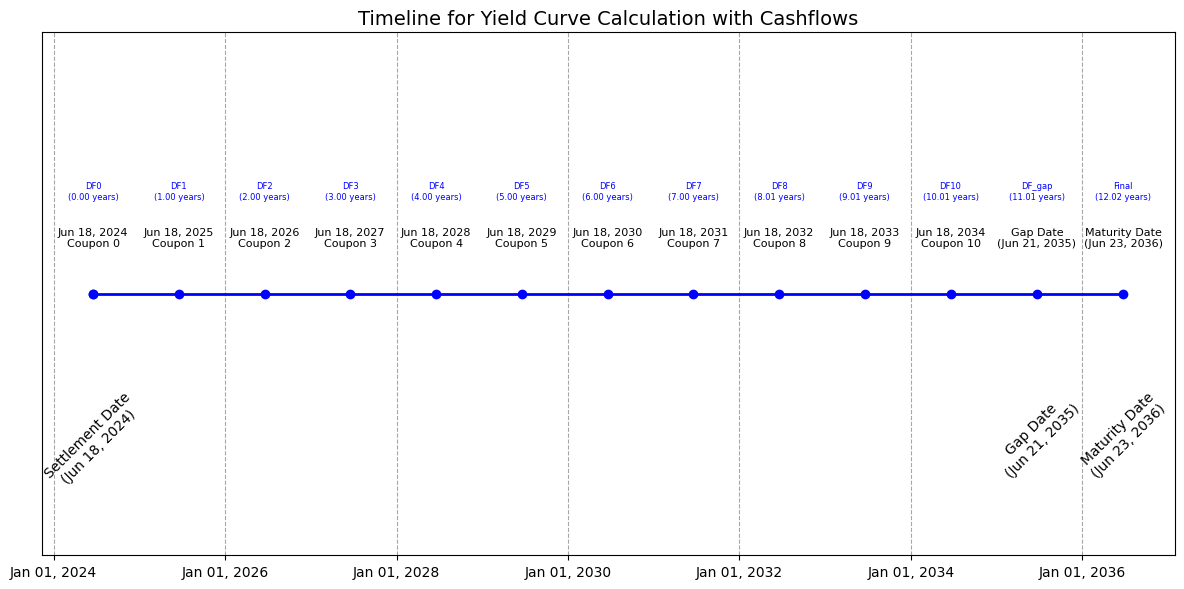

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the important dates and durations for the cashflow
settlement_date = datetime(2024, 6, 18)
annual_coupon_dates = [
    datetime(2024, 6, 18),
    datetime(2025, 6, 18),
    datetime(2026, 6, 18),
    datetime(2027, 6, 18),
    datetime(2028, 6, 18),
    datetime(2029, 6, 18),
    datetime(2030, 6, 18),
    datetime(2031, 6, 18),
    datetime(2032, 6, 18),
    datetime(2033, 6, 18),
    datetime(2034, 6, 18),
]
gap_date = datetime(2035, 6, 21)
maturity_date = datetime(2036, 6, 23)

# Define the durations
coupon_durations = [(date - settlement_date).days / 365 for date in annual_coupon_dates]
gap_duration = (gap_date - settlement_date).days / 365
final_duration = (maturity_date - settlement_date).days / 365

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the timeline
ax.plot([settlement_date, maturity_date], [0, 0], color='blue', linewidth=2)
ax.scatter([settlement_date] + annual_coupon_dates + [gap_date, maturity_date], [0] * (len(annual_coupon_dates) + 3), color='blue')

# Add labels for settlement, gap, and maturity dates below the axis with slanted text
ax.text(settlement_date, -0.02, 'Settlement Date\n(Jun 18, 2024)', ha='center', fontsize=10, va='top', rotation=45)
ax.text(gap_date, -0.02, 'Gap Date\n(Jun 21, 2035)', ha='center', fontsize=10, va='top', rotation=45)
ax.text(maturity_date, -0.02, 'Maturity Date\n(Jun 23, 2036)', ha='center', fontsize=10, va='top', rotation=45)

# Add labels for the dates and discount factors directly above the coupon dates
for i, (date, duration) in enumerate(zip(annual_coupon_dates, coupon_durations)):
    ax.text(date, 0.02, f'DF{i}\n({duration:.2f} years)', ha='center', color='blue', fontsize=6)
    ax.text(date, 0.01, f'{date.strftime("%b %d, %Y")}\nCoupon {i}', ha='center', fontsize=8)

ax.text(gap_date, 0.02, f'DF_gap\n({gap_duration:.2f} years)', ha='center', color='blue', fontsize=6)
ax.text(gap_date, 0.01, 'Gap Date\n(Jun 21, 2035)', ha='center', fontsize=8)

ax.text(maturity_date, 0.02, f'Final\n({final_duration:.2f} years)', ha='center', color='blue', fontsize=6)
ax.text(maturity_date, 0.01, 'Maturity Date\n(Jun 23, 2036)', ha='center', fontsize=8)

# Set the x-axis format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Label every 2 years

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add grid and labels
plt.grid(visible=True, axis='x', linestyle='--', color='grey', alpha=0.7)
plt.title('Timeline for Yield Curve Calculation with Cashflows', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

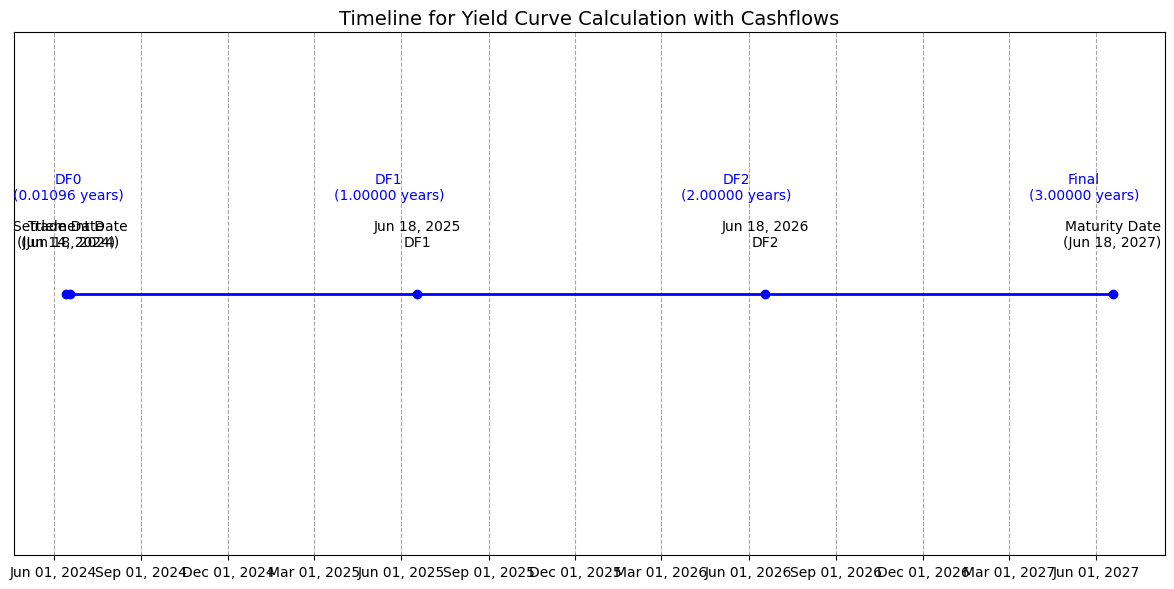

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the important dates and durations for the cashflow
trade_date = datetime(2024, 6, 14)
settlement_date = datetime(2024, 6, 18)
cashflow_dates = [datetime(2025, 6, 18), datetime(2026, 6, 18), datetime(2027, 6, 18)]
maturity_date = datetime(2027, 6, 18)

# Define the durations
df0_duration = (settlement_date - trade_date).days / 365
df1_duration = (cashflow_dates[0] - settlement_date).days / 365
df2_duration = (cashflow_dates[1] - settlement_date).days / 365
final_duration = (cashflow_dates[2] - settlement_date).days / 365

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the timeline
ax.plot([trade_date, maturity_date], [0, 0], color='blue', linewidth=2)
ax.scatter([trade_date, settlement_date] + cashflow_dates, [0, 0, 0, 0, 0], color='blue')

# Add labels for the dates
ax.text(trade_date, 0.01, 'Trade Date\n(Jun 14, 2024)', ha='center', fontsize=10)
ax.text(settlement_date, 0.01, 'Settlement Date\n(Jun 18, 2024)', ha='center', fontsize=10)
ax.text(cashflow_dates[0], 0.01, 'Jun 18, 2025\nDF1', ha='center', fontsize=10)
ax.text(cashflow_dates[1], 0.01, 'Jun 18, 2026\nDF2', ha='center', fontsize=10)
ax.text(cashflow_dates[2], 0.01, 'Maturity Date\n(Jun 18, 2027)', ha='center', fontsize=10)

# Add labels for the discount factors and durations
ax.text(settlement_date - timedelta(days=2), 0.02, f'DF0\n({df0_duration:.5f} years)', ha='center', color='blue', fontsize=10)
ax.text(cashflow_dates[0] - timedelta(days=30), 0.02, f'DF1\n({df1_duration:.5f} years)', ha='center', color='blue', fontsize=10)
ax.text(cashflow_dates[1] - timedelta(days=30), 0.02, f'DF2\n({df2_duration:.5f} years)', ha='center', color='blue', fontsize=10)
ax.text(cashflow_dates[2] - timedelta(days=30), 0.02, f'Final\n({final_duration:.5f} years)', ha='center', color='blue', fontsize=10)

# Set the x-axis format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Remove the y-axis
ax.yaxis.set_visible(False)

# Add grid and labels
plt.grid(visible=True, axis='x', linestyle='--', color='grey', alpha=0.7)
plt.title('Timeline for Yield Curve Calculation with Cashflows', fontsize=14)
plt.tight_layout()

# Save the plot as an image
# plt.savefig('/mnt/data/timeline_cashflows_yield_curve_calculation_improved.png')

# Show the plot
plt.show()

In [84]:
1/(1+0.0531451200637839*4/360)

0.9994098471520019

In [90]:
import numpy as np

df = 1/(1+0.053225*7/360)*1/(1+0.0532132*4/360)

print(data["Calculated Discount"][0])

-np.log(df)/11*365



0.9983758419138119


0.053936329985046425

In [57]:
-np.log(1/(1+0.053225*4/360))/4*365

0.053948285474668636